In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:


df=pd.read_csv('C:/Users/EZHILVATHANI S/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# finding outliers

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


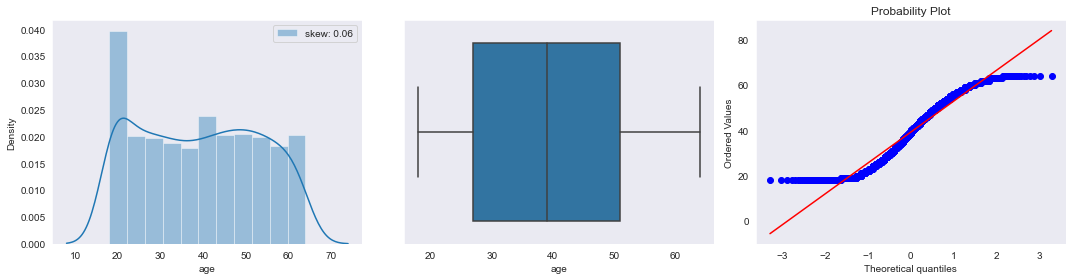

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


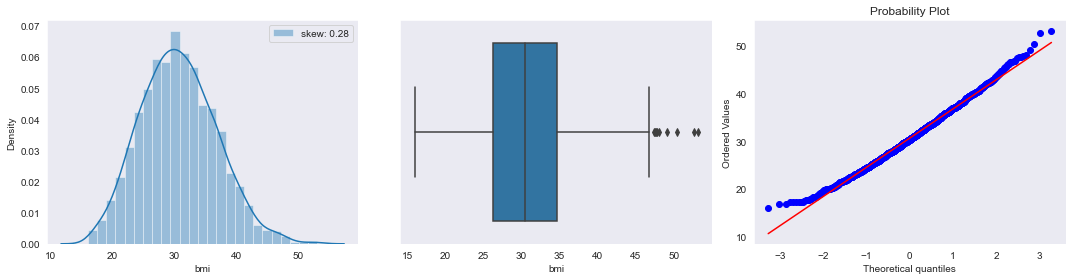

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


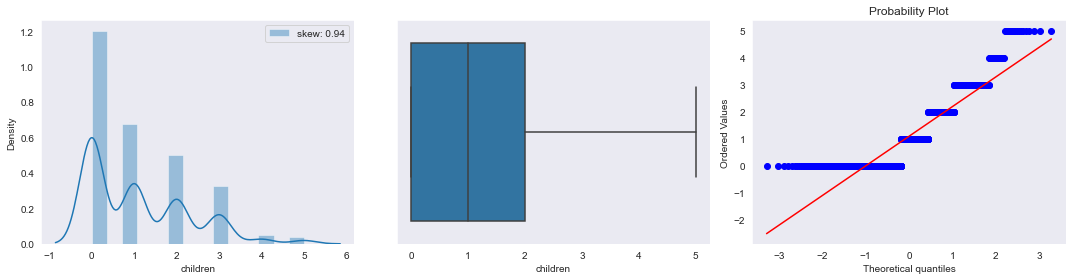

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


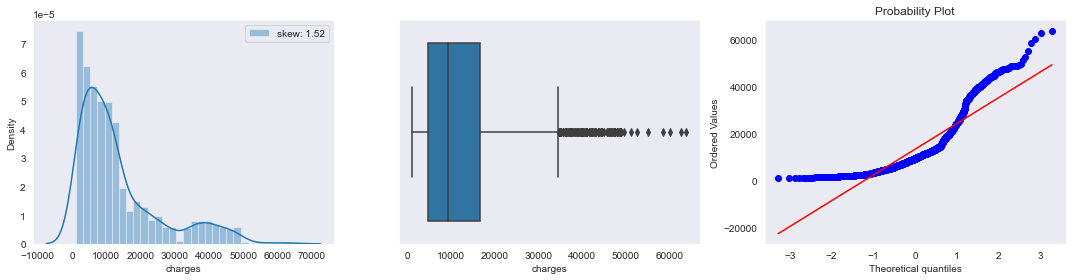

In [9]:
sns.set_style('dark')
for cols in df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[cols], label="skew: " + str(np.round(df[cols].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[cols])
    plt.subplot(133)
    stats.probplot(df[cols], plot=plt)
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

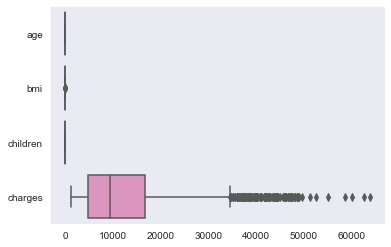

In [10]:
sns.boxplot(data=df, orient="h", palette="Set2")

# treating outliers

In [11]:
col_sel=['bmi','charges']
def iqr_capping(df, cols, factor):
    
    for x in cols:  
        q1 = df[x].quantile(0.25)
        q3 = df[x].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[x] = np.where(df[x]>upper_whisker, upper_whisker,
            np.where(df[x]<lower_whisker, lower_whisker, df[x]))

        
iqr_capping(df, col_sel, 1.5)

<AxesSubplot:>

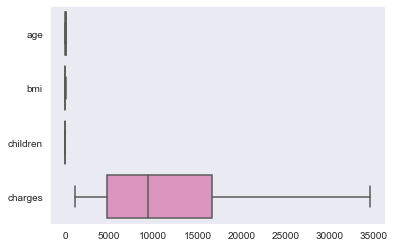

In [12]:
sns.boxplot(data=df, orient="h", palette="Set2")

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


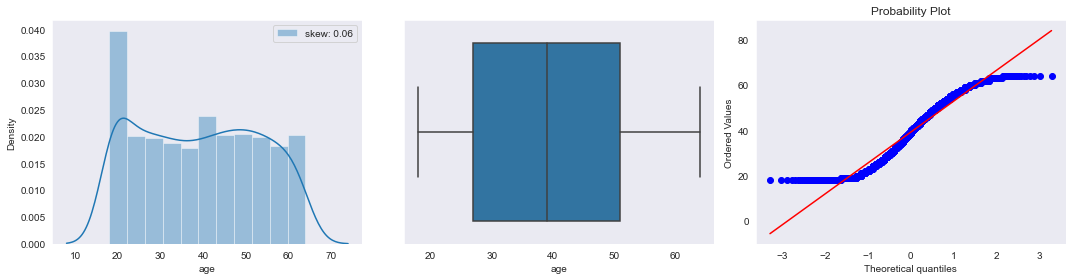

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


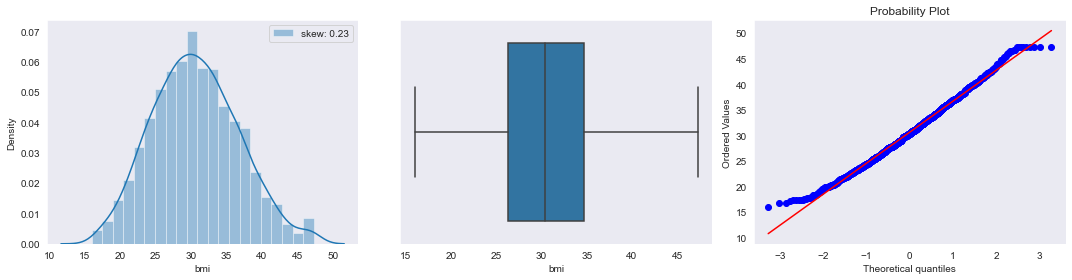

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


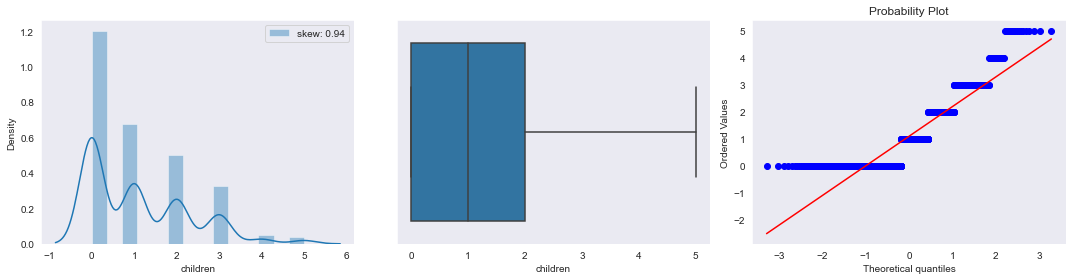

C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EZHILVATHANI S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


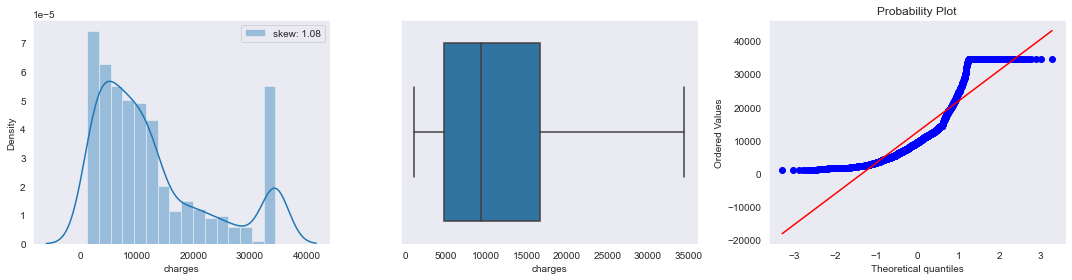

In [13]:
sns.set_style('dark')
for cols in df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[cols], label="skew: " + str(np.round(df[cols].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[cols])
    plt.subplot(133)
    stats.probplot(df[cols], plot=plt)
    plt.tight_layout()
    plt.show()

In [14]:
df = df.drop(['region'], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [15]:
#only categorical features 
df_category = df.select_dtypes(include=['object'])
df_category.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [16]:
df_dummy=pd.get_dummies(df_category,drop_first=True)
df_dummy.head()

,sex_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
df_dummy.shape

(1338, 2)

In [18]:
# dropping categorical columns 

df=df.drop(list(df_category.columns), axis=1)
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [19]:
#merging numerical columns and dummy columns for train
df_1 = pd.concat([df,df_dummy] ,axis=1)
df_1

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [20]:
Y = df_1['charges']
X = df_1.drop('charges', axis = 1)

In [21]:
X.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [22]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 5), (268, 5), (1070,), (268,))

In [25]:
X_train

,age,bmi,children,sex_male,smoker_yes
353,33,35.245,0,1,0
616,56,28.595,0,0,0
17,23,23.845,0,1,0
1125,63,25.080,0,0,0
1249,32,33.630,1,1,1
...,...,...,...,...,...
467,56,33.820,2,0,0
473,47,33.345,0,0,0
828,41,30.780,3,1,1
612,18,33.155,0,0,0


In [26]:
X_test

,age,bmi,children,sex_male,smoker_yes
734,59,32.100,3,0,0
414,19,35.150,0,0,0
495,20,27.930,0,1,0
1208,37,25.555,1,0,1
752,64,37.905,0,1,0
...,...,...,...,...,...
316,50,32.205,0,1,0
964,52,36.765,2,1,0
176,38,27.835,2,1,0
1155,36,22.135,3,0,0


In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 1.40030121,  0.24711871,  1.61197401, -1.0075048 , -0.51891848],
       [-1.45242342,  0.75857823, -0.90845296, -1.0075048 , -0.51891848],
       [-1.38110531, -0.45215544, -0.90845296,  0.99255111, -0.51891848],
       ...,
       [-0.09737922, -0.46808615,  0.77183169,  0.99255111, -0.51891848],
       [-0.24001545, -1.42392852,  1.61197401, -1.0075048 , -0.51891848],
       [-1.52374154,  0.21693422, -0.90845296, -1.0075048 , -0.51891848]])

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
from keras import models
from keras import layers

In [31]:
'''model = models.Sequential()
model.add(layers.Dense(64,  input_dim=9))
model.add(layers.Dense(64))
model.add(layers.Dense(1))'''

'model = models.Sequential()\nmodel.add(layers.Dense(64,  input_dim=9))\nmodel.add(layers.Dense(64))\nmodel.add(layers.Dense(1))'

In [32]:
# Model
model = Sequential()
model.add(Dense(200, kernel_initializer='uniform',input_dim=5))
model.add(Dense(500,kernel_initializer='uniform'))
model.add(Dense(350,kernel_initializer='uniform'))

model.add(Dense(1))

In [33]:
#model.compile(optimizer = 'adam', loss = 'mean_squared_error', )

In [34]:
model.compile(optimizer="Adam",
              loss="mse",
              metrics=['msle'])

In [35]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
34/34 [==============================] - 1s 11ms/step - loss: 264720912.0000 - msle: 59.9295 - val_loss: 223430352.0000 - val_msle: 35.1951
Epoch 2/10
34/34 [==============================] - 0s 6ms/step - loss: 216623520.0000 - msle: 25.6427 - val_loss: 121644416.0000 - val_msle: 18.6061
Epoch 3/10
34/34 [==============================] - 0s 6ms/step - loss: 62144964.0000 - msle: 14.2431 - val_loss: 34220912.0000 - val_msle: 2.5396
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 26214416.0000 - msle: 0.4668 - val_loss: 28785888.0000 - val_msle: 0.2648
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 25870798.0000 - msle: 0.2812 - val_loss: 28553694.0000 - val_msle: 0.2471
Epoch 6/10
34/34 [==============================] - 0s 5ms/step - loss: 25811856.0000 - msle: 0.2077 - val_loss: 29937148.0000 - val_msle: 0.2834
Epoch 7/10
34/34 [==============================] - 0s 5ms/step - loss: 25978620.0000 - msle: 0.3576 - val_loss: 2

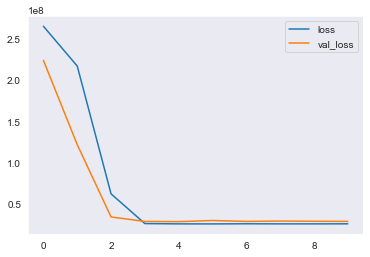

In [37]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Now we are going to implement the Same model in Machine Learning

In [38]:
from sklearn.model_selection import train_test_split #30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
Y_pred = lm.predict(X_test)
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_test,Y_pred))}, r2 score = {metrics.r2_score(y_test,Y_pred)}')

RMSE = 4867.016077104467, r2 score = 0.7452038678384738


In [41]:
print("Train_score:", lm.score(X_train,y_train))
print("Test_score:", lm.score(X_test,y_test))

Train_score: 0.7463484760442997
Test_score: 0.7452038678384738


In [42]:
###### Adaboost Regression in Python #######
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
print(model_ABR)

AdaBoostRegressor()


In [43]:
print("Train_score:",model_ABR.score(X_train,y_train))
print("Test_score:",model_ABR.score(X_test,y_test))

Train_score: 0.8029012035258757
Test_score: 0.7798875802007417


In [44]:
from xgboost import XGBRegressor
Xg = XGBRegressor()
Xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [45]:
X_train_pred = Xg.predict(X_train)
training_data_score = r2_score(X_train_pred,y_train)
print('r2 score for training data is :', training_data_score)

r2 score for training data is : 0.993674482747164


In [46]:
X_test_pred = Xg.predict(X_test)
test_data_score = r2_score(X_test_pred,y_test)
print("R2_score on test data is: ",test_data_score)

R2_score on test data is:  0.6971723347877926


In [47]:
##RandomForest

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [48]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7940687575599525


In [49]:
print("Train_score:",rf.score(X_train,y_train))
print("Test_score:",rf.score(X_test,y_test))

Train_score: 0.8117964387746638
Test_score: 0.7940687575599525
